In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [68]:
tripdata = pd.read_csv("../dataset/complete_bike_sharing.csv")
tripdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353892 entries, 0 to 353891
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             353892 non-null  int64  
 1   starttime                353892 non-null  object 
 2   stoptime                 353892 non-null  object 
 3   start station id         353892 non-null  int64  
 4   start station name       353892 non-null  object 
 5   start station latitude   353892 non-null  float64
 6   start station longitude  353892 non-null  float64
 7   end station id           353892 non-null  int64  
 8   end station name         353892 non-null  object 
 9   end station latitude     353892 non-null  float64
 10  end station longitude    353892 non-null  float64
 11  bikeid                   353892 non-null  int64  
 12  usertype                 353892 non-null  object 
 13  birth year               353892 non-null  int64  
 14  gend

## Data Exploration

In [70]:
User = pd.DataFrame()
User['avg_trip duration'] = round(tripdata.groupby('usertype')['tripduration'].mean())
User = User.reset_index()
User['usertype'] = User['usertype'].astype('object')
User
User

,usertype,avg_trip duration
0,Customer,3020.0
1,Subscriber,517.0


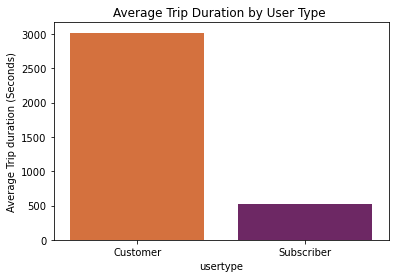

In [72]:
ax2 = sns.barplot('usertype', 'avg_trip duration', data = User,palette="inferno_r")
ax2.set_title('Average Trip Duration by User Type ')
ax2.set_ylabel('Average Trip duration (Seconds)')
plt.show()

we can say that average number of users are one time users or tourists 
compared to the subscribed users.

In [73]:
px.pie(values = tripdata['gender'].value_counts(),
       names = tripdata['gender'].value_counts().index,
       title ="Gender Distribution")


#### Here labels are 1 : Male, 2 : Female, 0 : No_Gender
More number of male users than female and some people not gender identifiable.

In [74]:
tripdata['birthyear'] = pd.to_numeric(tripdata['birth year'], downcast='integer')
tripdata['Years_old'] = tripdata['year'] - tripdata['birthyear'] 
Age_Groups = ["<20", "20-29", "30-39", "40-49", "50-59", "60-64","65+"]
Age_Groups_Limits = [0, 20, 30, 40, 50, 60, 65, np.inf]
Age_Min = 0
Age_Max = 100
tripdata["Age_group"] = pd.cut(tripdata["Years_old"], Age_Groups_Limits, labels=Age_Groups)

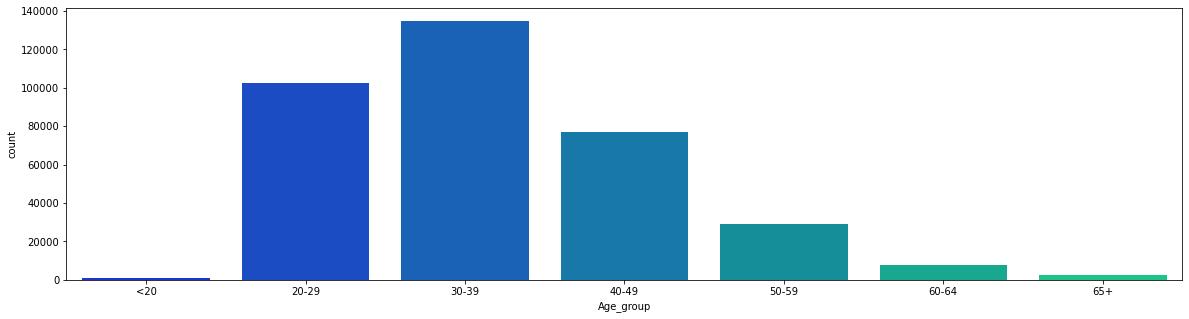

In [76]:
plt.figure(figsize = (20,5))
sns.countplot(tripdata["Age_group"],palette = "winter")
plt.show()

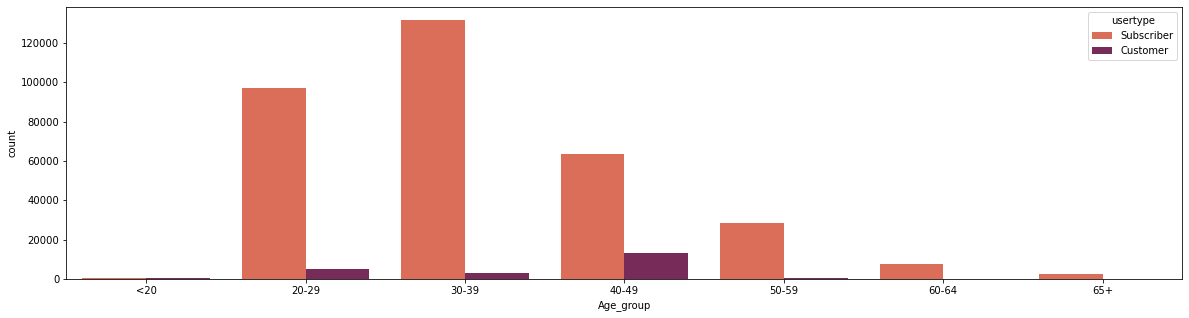

In [77]:
plt.figure(figsize = (20,5))
sns.countplot(tripdata["Age_group"],hue=tripdata["usertype"],palette="rocket_r")
plt.show()

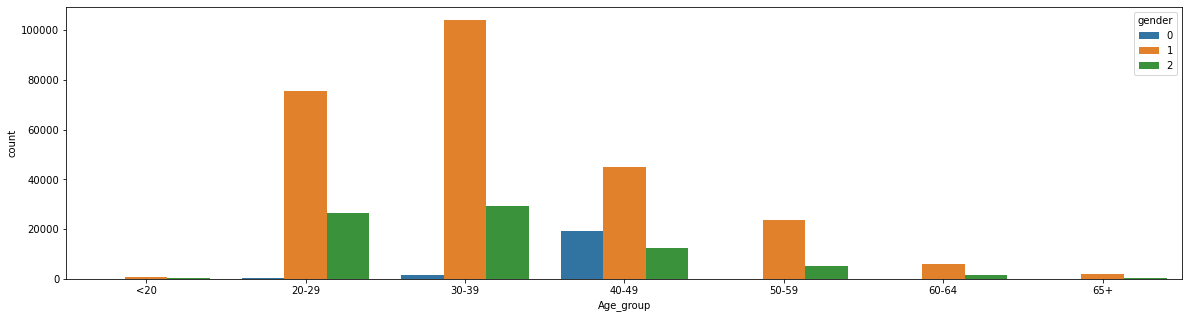

In [78]:
plt.figure(figsize = (20,5))
sns.countplot(tripdata["Age_group"],hue=tripdata["gender"])
plt.show()

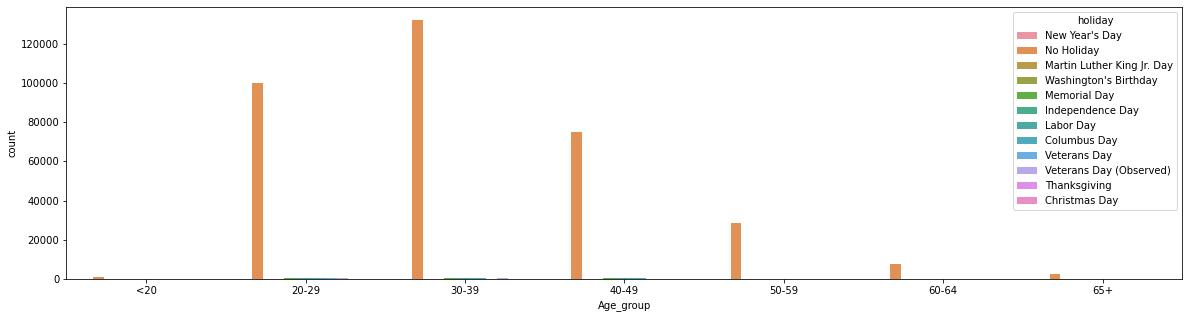

We can conclude that age group between 30-39 of male users who are subscribed using more bike rides during working days.

### box plot for the age 

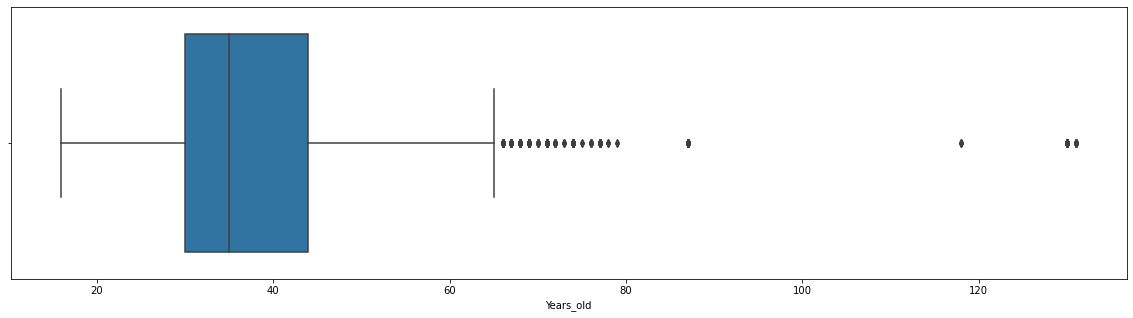

In [97]:
plt.figure(figsize = (20,5))
sns.boxplot(tripdata.Years_old)
plt.show()

In [98]:
tripdata["Years_old"].describe()

count    353892.000000
mean         37.612125
std          10.268528
min          16.000000
25%          30.000000
50%          35.000000
75%          44.000000
max         131.000000
Name: Years_old, dtype: float64

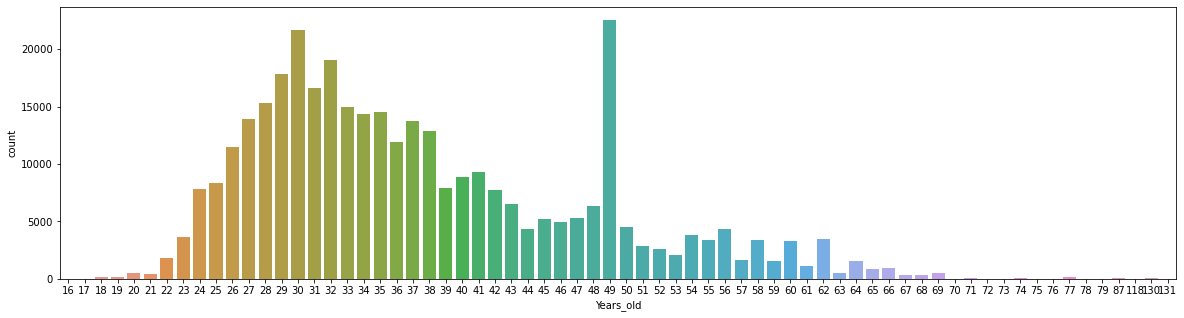

In [102]:
plt.figure(figsize = (20,5))
sns.countplot(tripdata["Years_old"])
plt.show()


People having age above 60yrs(approx) are the outliers for this dataset.

### Peak hours of the day for using bike

In [107]:
px.bar(x=tripdata["hour"].value_counts().index,
       y=tripdata["hour"].value_counts().values,
       color=tripdata["hour"].value_counts().values,
       title = "Bike usage hourly basis",
       labels={'x':'Time',"y":"Number of people using bike"})

### peak day of the bike usage

In [113]:
px.bar(x=tripdata["day"].value_counts().index,
       y=tripdata["day"].value_counts().values,
       color=tripdata["day"].value_counts().index,
       title = "Bike usage of the day",
       labels={'x':'Day',"y":"Number of people using bike"})

### Peak month of the year

In [82]:
px.bar(x=tripdata["month"].value_counts().index,
       y=tripdata["month"].value_counts().values,
       title = "Bike usage of the month",
       labels={'x':'Month',"y":"Number of people using bike"})

### Peak season of the year 

In [117]:
px.bar(x=tripdata["seasons"].value_counts().index,
       y=tripdata["seasons"].value_counts().values,
       color=tripdata["seasons"].value_counts().index,
       title = "Bike usage of the season",
       labels={'x':'Season',"y":"Number of people using bike"})

### when do bike used most holidays or no holidays?

In [118]:
px.bar(x=tripdata["holiday"].value_counts().index,
       y=tripdata["holiday"].value_counts().values,
       color=tripdata["holiday"].value_counts().values,
       title = "Bike usage of the day",
       labels={'x':'Holiday',"y":"Number of people using bike"})

We can conclude that 
1. morning 8am and evening 5-6 pm during and after work used most
2. weekdays people used more than weekends
3. During summer season of month june-july-August used most than winter
4. During non holidays bike usage counted high than holidays.

### Explore data on stations

In [119]:
px.bar(x=tripdata["start station name"].value_counts().index,
       y=tripdata["start station name"].value_counts().values,
       color=tripdata["start station name"].value_counts().values,
       labels={'x':'Station Name',"y":"Count"})

In [120]:
px.bar(x=tripdata["end station name"].value_counts().index,
       y=tripdata["end station name"].value_counts().values,
       color=tripdata["end station name"].value_counts().values,
       labels={'x':'Station Name',"y":"Count"})


Grove St Path is the most used station than other stations and some of the stations no single trip is being recorded

## visualization of the famous routes

In [121]:
trips_df = pd.DataFrame()
trips_df = tripdata.groupby(['start station name','end station name']).size().reset_index(name = 'Number of Trips')
trips_df = trips_df.sort_values('Number of Trips',ascending = False)
trips_df["start station name"] = trips_df["start station name"].astype(str)
trips_df["end station name"] = trips_df["end station name"].astype(str)
trips_df["Routes"] = trips_df["start station name"] + " to " + trips_df["end station name"]
trips_df = trips_df[:10]
trips_df = trips_df.reset_index()
trips_df

,index,start station name,end station name,Number of Trips,Routes
0,1008,Hamilton Park,Grove St PATH,7874,Hamilton Park to Grove St PATH
1,955,Grove St PATH,Hamilton Park,5871,Grove St PATH to Hamilton Park
2,1937,Morris Canal,Exchange Place,4604,Morris Canal to Exchange Place
3,239,Brunswick & 6th,Grove St PATH,4265,Brunswick & 6th to Grove St PATH
4,1364,Jersey & 6th St,Grove St PATH,4135,Jersey & 6th St to Grove St PATH
5,292,Brunswick St,Grove St PATH,3989,Brunswick St to Grove St PATH
6,740,Exchange Place,Morris Canal,3319,Exchange Place to Morris Canal
7,610,Dixon Mills,Grove St PATH,3280,Dixon Mills to Grove St PATH
8,1733,Marin Light Rail,Grove St PATH,3216,Marin Light Rail to Grove St PATH
9,2491,Van Vorst Park,Grove St PATH,3177,Van Vorst Park to Grove St PATH


In [124]:
label = ["Hamilton Park", "Grove St PATH", "Morris Canal", "Brunswick & 6th", 
         "Jersey & 6th St", "Brunswick St", "Exchange Place", "Dixon Mills",
         "Marin Light Rail", "Van Vorst Park", "Grove St PATH", "Hamilton Park", 
         "Exchange Place", "Grove St PATH"," Grove St PATH", "Grove St PATH", 
         "Morris Canal", "Grove St PATH", "Grove St PATH"," Grove St PATH"]

source = [0,1,2,3,4,5,6,7,8,9]
target = [1, 0, 5, 0, 0, 0, 2, 0, 0, 0 ]
value = [7874, 5871, 4604, 4265, 4135, 3989, 3319, 3280, 3216, 3177]

link = dict(source = source, target = target, value = value)
node = dict(label = label, pad=50, thickness=5)
data = go.Sankey(link = link, node=node)



fig = go.Figure(data)
fig.update_layout(
    
    title="Routes used most of the time",
    font=dict(size = 10, color = 'white'),
    plot_bgcolor='black',
    paper_bgcolor='black'
)
fig.show()

## Based on the above analysis, Hamilton Park to Grove St PATH is the most popular route

In [125]:
bike_use_df = pd.DataFrame()
bike_use_df = tripdata.groupby(['bikeid']).size().reset_index(name = 'Number of Times Used')
bike_use_df = bike_use_df.sort_values('Number of Times Used', ascending = False)
bike_use_df = bike_use_df[:10]
bike_use_df['bikeid'] = bike_use_df['bikeid'].astype(str)
bike_use_df['bikeid'] = ('Bike ' + bike_use_df['bikeid'])
bike_use_df = bike_use_df.reset_index()
bike_use_df.head()

,index,bikeid,Number of Times Used
0,71,Bike 26155,873
1,201,Bike 26288,854
2,518,Bike 29586,842
3,530,Bike 29598,836
4,540,Bike 29608,833


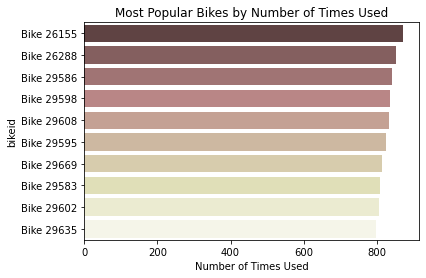

In [129]:
ax8 = sns.barplot('Number of Times Used', 'bikeid',data = bike_use_df, palette="pink")
ax8.set_title('Most Popular Bikes by Number of Times Used')
plt.show()


In [132]:
### Find most common start and end routes 
import folium
df_sub = tripdata[['start station name','end station name', 'start station latitude','start station longitude','end station latitude','end station longitude']]
df_sub['both'] = df_sub['start station name'] + ', ' + df_sub['end station name']
df_sub = df_sub.groupby(['start station name','end station name', 'start station latitude','start station longitude','end station latitude','end station longitude'])['both'].count().reset_index(name='Counts of trips')

df_sub = df_sub.nsmallest(100, columns=['Counts of trips'])
df_sub

,start station name,end station name,start station latitude,start station longitude,end station latitude,end station longitude,Counts of trips
9,5 Corners Library,Communipaw & Berry Lane,40.734961,-74.059503,40.714358,-74.066611,1
23,5 Corners Library,JCBS Depot,40.734961,-74.059503,40.709651,-74.068601,1
51,Astor Place,6 Ave & W 33 St,40.719282,-74.071262,40.749013,-73.988484,1
54,Astor Place,Barrow St & Hudson St,40.719282,-74.071262,40.731724,-74.006744,1
56,Astor Place,Broadway & Battery Pl,40.719282,-74.071262,40.704633,-74.013617,1
...,...,...,...,...,...,...,...
901,Grand St,Jackson Square,40.715178,-74.037683,40.711130,-74.078900,1
922,Grand St,S Portland Ave & Hanson Pl,40.715178,-74.037683,40.685396,-73.974315,1
923,Grand St,Sip Ave,40.715178,-74.037683,40.730743,-74.063784,1
924,Grand St,South End Ave & Liberty St,40.715178,-74.037683,40.711512,-74.015756,1


In [133]:
map1 = folium.Map(

    location=[40.732775,-74.105973],
    tiles='cartodbpositron',
    zoom_start= 15,
    max_width= 150, max_height=150

)


df_sub.apply(lambda row:folium.CircleMarker(location=[row["end station latitude"], row["end station longitude"]], popup=row["end station name"],radius=5, color="Black").add_to(map1), axis=1)
df_sub.apply(lambda row:folium.CircleMarker(location=[row["start station latitude"], row["start station longitude"]],popup=row["start station name"]).add_to(map1), axis=1)


map1